# Busquedas en la web de las distintas Marcas

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (22, 10)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [170]:
df = pd.read_csv('./data/events.csv', low_memory=False)
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month

In [172]:
busquedas_filter = df.filter(items=["event","search_term", "month"])
busquedas_filter = busquedas_filter[busquedas_filter.search_term.notnull()]
busquedas_filter["Cantidad"] = 1
busquedas_filter

,event,search_term,month,Cantidad
157,searched products,moto g 4,2,1
159,searched products,moto g 4,2,1
238,searched products,comprar celulares usados bom e barato em poa rs,5,1
239,searched products,comprar celulares seminovos bom e barato em po...,5,1
240,searched products,comprar celulares seminovos bom e barato em po...,5,1
288,searched products,Samsung Galaxy S7,6,1
357,searched products,Iphone 6,5,1
371,searched products,CARREGADOR IPHONE 6S,5,1
674,searched products,Iphone 6 plus,6,1
695,searched products,j7,5,1


In [173]:
busquedas_filter = busquedas_filter.groupby(by='search_term').agg({'Cantidad': 'sum'})
busquedas_filter.index
busquedas_filter = busquedas_filter.reset_index()
busquedas_filter.set_index('search_term', inplace=True)
busquedas_filter = busquedas_filter.reset_index()
busquedas_filter

,search_term,Cantidad
0,"""Galaxy Tab E 9.6 Wi-Fi""",1
1,"""Samsung Galaxy J1""",3
2,#2793522,2
3,",moto z.",1
4,.,1
5,. Galaxy J7 Prime,1
6,1 Carregador alternativo,1
7,100,5
8,1020,1
9,128,3


In [174]:
busquedas_filter.search_term.count()
#Hay 5851 terminos de busqueda en total

5851

In [175]:
apple_filter = busquedas_filter[(busquedas_filter.search_term.str.contains("Ip")  |busquedas_filter.search_term.str.contains("ip") )]
apple_filter = apple_filter.sort_values(by='Cantidad', ascending=False)
apple_filter

,search_term,Cantidad
1142,Iphone,1207
1236,Iphone 6,1057
4425,iphone 6,932
4347,iphone,882
4479,iphone 6s,784
1308,Iphone 6s,736
4522,iphone 7,428
1359,Iphone 7,412
1211,Iphone 5s,343
4407,iphone 5s,315


In [176]:
samsung_filter =  busquedas_filter[(busquedas_filter.search_term.str.contains("sam")  |busquedas_filter.search_term.str.contains("Sam") |busquedas_filter.search_term.str.contains("j7") |busquedas_filter.search_term.str.contains("J7")|busquedas_filter.search_term.str.contains("J5") |busquedas_filter.search_term.str.contains("j5"))]
samsung_filter.sort_values(by='Cantidad', ascending=False)

,search_term,Cantidad
1589,J7,580
1544,J5,540
2580,Samsung,513
4694,j7,370
4668,j5,310
1626,J7 prime,215
4717,j7 prime,202
1569,J5 prime,150
1635,J7 pro,106
4685,j5 pro,104


In [177]:
motorola_filter = busquedas_filter[(busquedas_filter.search_term.str.contains("mot")  |busquedas_filter.search_term.str.contains("Mot") )]
motorola_filter.sort_values(by='Cantidad', ascending=False)

,search_term,Cantidad
2157,Motorola,679
2048,Moto g5,235
1999,Moto g,180
2040,Moto g4,177
5073,motorola,171
5038,moto z,152
2099,Moto z,139
4987,moto g5,139
4943,moto g,122
4978,moto g4,103


In [178]:
asus_filter = busquedas_filter[(busquedas_filter.search_term.str.contains("Asu")  | busquedas_filter.search_term.str.contains("asu") | busquedas_filter.search_term.str.contains("zenf"))]
asus_filter.sort_values(by='Cantidad', ascending=False)

,search_term,Cantidad
253,Asus,118
3497,asus,79
5822,zenfone,61
5827,zenfone 4,17
3418,Zenfone asus,10
3508,asus zenfone,9
5824,zenfone 3,9
269,Asus zenfone,8
267,Asus zen fone,5
5828,zenfone 4 max,4


In [179]:
lg_filter =  busquedas_filter[(busquedas_filter.search_term.str.contains("LG")  |busquedas_filter.search_term.str.contains("lg") )]
lg_filter.sort_values(by='Cantidad', ascending=False)

,search_term,Cantidad
4824,lg k10,84
1725,LG k10,64
1691,LG,57
4797,lg,51
4829,lg k10 novo,19
1705,LG K10,19
424,Celular lg k10,18
4817,lg g5,18
4814,lg g4,17
4820,lg g6,14


In [180]:
sony_filter =  busquedas_filter[(busquedas_filter.search_term.str.contains("sony")  |busquedas_filter.search_term.str.contains("Sony") )]
sony_filter.sort_values(by='Cantidad', ascending=False)

,search_term,Cantidad
3202,Sony,113
5692,sony,29
3206,Sony Xperia,24
3232,Sony xperia z5,9
3235,Sony z3,8
3219,Sony Xperia m4,8
3216,Sony Xperia Z3,8
3224,Sony c,7
5694,sony m4 aqua,5
3231,Sony xperia z3,5


In [181]:
lenovo_filter =  busquedas_filter[(busquedas_filter.search_term.str.contains("lenovo")  |busquedas_filter.search_term.str.contains("Lenovo") )]
lenovo_filter.sort_values(by='Cantidad', ascending=False)

,search_term,Cantidad
1757,Lenovo,77
4781,lenovo,35
4789,lenovo vibe k5,9
1773,Lenovo vibe k5,7
4791,lenovo vibe k6,6
4783,lenovo k5,6
1765,Lenovo k5,6
1767,Lenovo k6,4
466,Celulares Lenovo,4
1675,K6 Lenovo,4


In [182]:
black_filter =  busquedas_filter[(busquedas_filter.search_term.str.contains("blackberry")  |busquedas_filter.search_term.str.contains("Black") )]
black_filter.sort_values(by='Cantidad', ascending=False)

,search_term,Cantidad
285,Blackberry,1


In [183]:
marcas_busquedas=  pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas_busquedas= marcas_busquedas.sort_values(by='Cantidad', ascending=False)
marcas_busquedas

,Marca,Cantidad
0,Apple,11605
1,Samsumg,8121
2,Motorola,5709
5,LG,664
6,Asus,438
4,Sony,286
3,Lenovo,206
7,Blackberry,1


Text(0,0.5,'Cantidad de Busquedas')

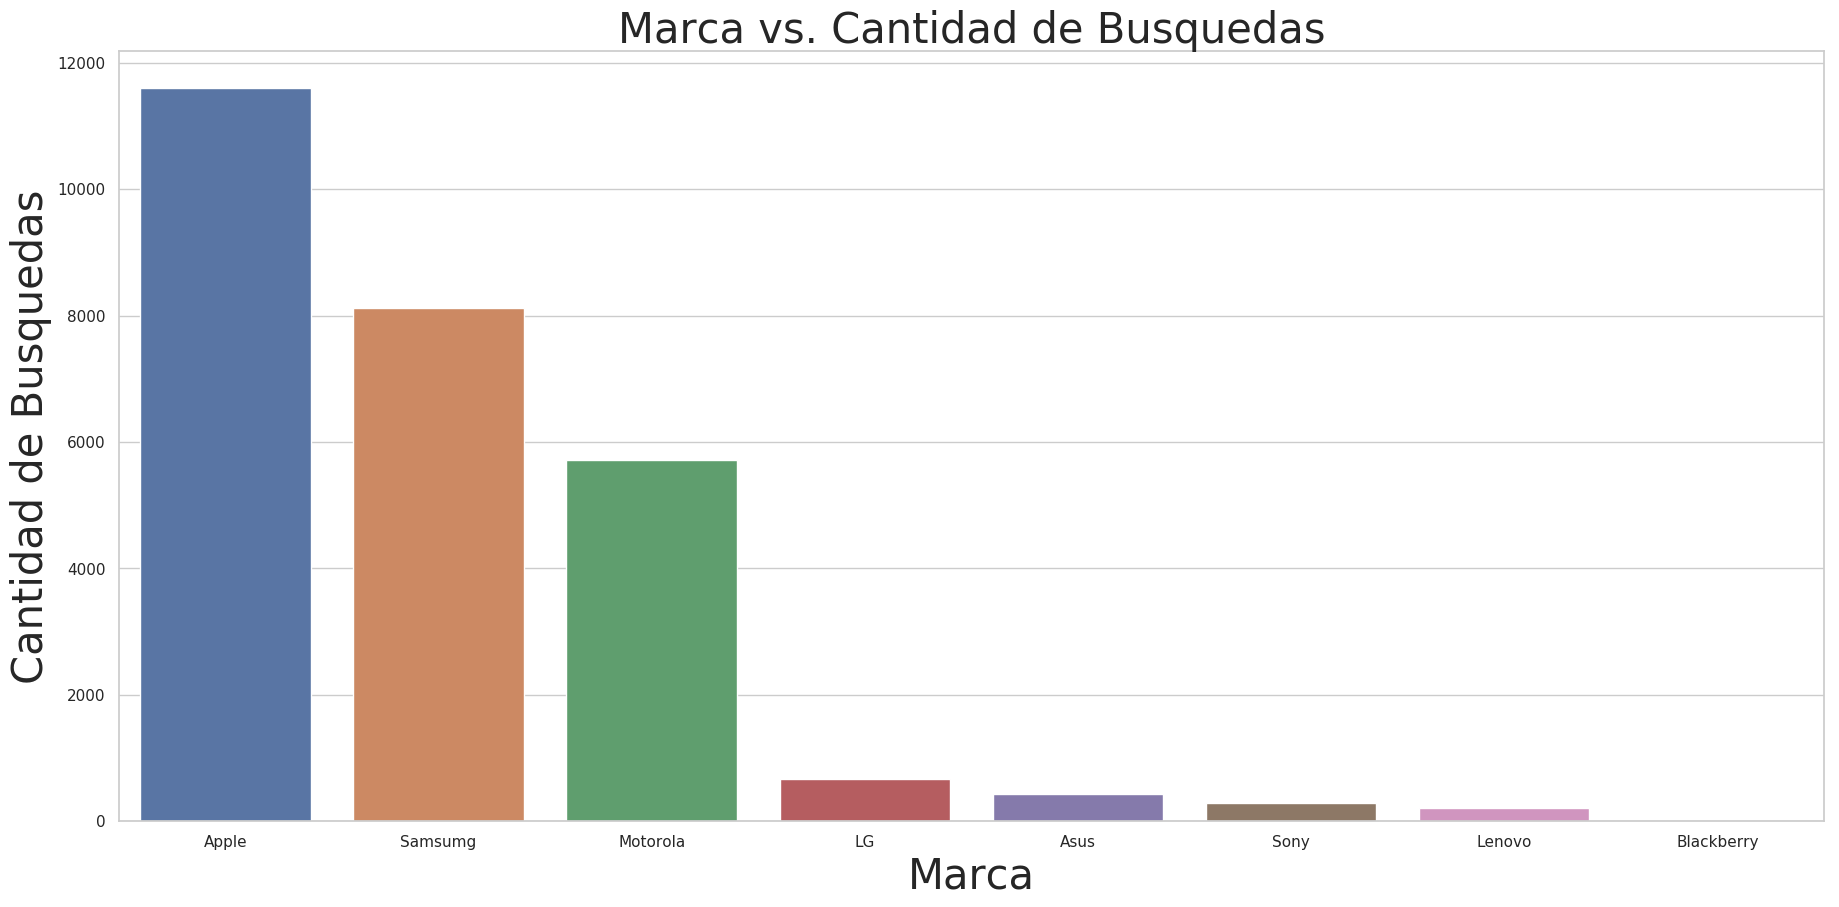

In [190]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas_busquedas["Marca"], y=marcas_busquedas['Cantidad'], orient='v')
marcas_plot.set_title("Marca vs. Cantidad de Busquedas", fontsize=30)
marcas_plot.set_xlabel("Marca", fontsize=30)
marcas_plot.set_ylabel("Cantidad de Busquedas", fontsize=30)

In [152]:
apple_filter = busquedas_filter[(busquedas_filter.search_term.str.contains("Ip")  |busquedas_filter.search_term.str.contains("ip") )]
apple_filter = apple_filter.sort_values(by='Cantidad', ascending=False)
apple_filter = apple_filter.groupby(["month"]).agg({'Cantidad': 'sum'})
apple_filter = apple_filter.reset_index()
apple_filter.columns = ["month", "Cantidad_Apple"]

In [153]:
samsung_filter =  busquedas_filter[(busquedas_filter.search_term.str.contains("sam")  |busquedas_filter.search_term.str.contains("Sam") |busquedas_filter.search_term.str.contains("j7") |busquedas_filter.search_term.str.contains("J7")|busquedas_filter.search_term.str.contains("J5") |busquedas_filter.search_term.str.contains("j5"))]
samsung_filter.sort_values(by='Cantidad', ascending=False)
samsung_filter = samsung_filter.groupby(["month"]).agg({'Cantidad': 'sum'})
samsung_filter = samsung_filter.reset_index()
samsung_filter.columns = ["month", "Cantidad_Sam"]

In [154]:
motorola_filter = busquedas_filter[(busquedas_filter.search_term.str.contains("mot")  |busquedas_filter.search_term.str.contains("Mot") )]
motorola_filter.sort_values(by='Cantidad', ascending=False)
motorola_filter = motorola_filter.groupby(["month"]).agg({'Cantidad': 'sum'})
motorola_filter = motorola_filter.reset_index()
motorola_filter.columns = ["month", "Cantidad_Moto"]

In [155]:
asus_filter = busquedas_filter[(busquedas_filter.search_term.str.contains("Asu")  | busquedas_filter.search_term.str.contains("asu") | busquedas_filter.search_term.str.contains("zenf"))]
asus_filter.sort_values(by='Cantidad', ascending=False)
asus_filter = asus_filter.groupby(["month"]).agg({'Cantidad': 'sum'})
asus_filter = asus_filter.reset_index()
asus_filter.columns = ["month", "Cantidad_Asus"]

In [156]:
lg_filter =  busquedas_filter[(busquedas_filter.search_term.str.contains("LG")  |busquedas_filter.search_term.str.contains("lg") )]
lg_filter.sort_values(by='Cantidad', ascending=False)
lg_filter = lg_filter.groupby(["month"]).agg({'Cantidad': 'sum'})
lg_filter = lg_filter.reset_index()
lg_filter.columns = ["month", "Cantidad_LG"]

In [158]:
lenovo_filter =  busquedas_filter[(busquedas_filter.search_term.str.contains("lenovo")  |busquedas_filter.search_term.str.contains("Lenovo") )]
lenovo_filter.sort_values(by='Cantidad', ascending=False)
lenovo_filter = lenovo_filter.groupby(["month"]).agg({'Cantidad': 'sum'})
lenovo_filter = lenovo_filter.reset_index()
lenovo_filter.columns = ["month", "Cantidad_Lenovo"]

In [159]:
sony_filter =  busquedas_filter[(busquedas_filter.search_term.str.contains("sony")  |busquedas_filter.search_term.str.contains("Sony") )]
sony_filter.sort_values(by='Cantidad', ascending=False)
sony_filter = sony_filter.groupby(["month"]).agg({'Cantidad': 'sum'})
sony_filter = sony_filter.reset_index()
sony_filter.columns = ["month", "Cantidad_Sony"]
sony_filter

,month,Cantidad_Sony
0,1,8
1,2,5
2,3,20
3,4,23
4,5,150
5,6,80


In [164]:
marcas_busquedas_meses = apple_filter
marcas_busquedas_meses = marcas_busquedas_meses.join(sony_filter.Cantidad_Sony)
marcas_busquedas_meses = marcas_busquedas_meses.join(lenovo_filter.Cantidad_Lenovo)
marcas_busquedas_meses = marcas_busquedas_meses.join(lg_filter.Cantidad_LG)
marcas_busquedas_meses = marcas_busquedas_meses.join(asus_filter.Cantidad_Asus)
marcas_busquedas_meses = marcas_busquedas_meses.join(motorola_filter.Cantidad_Moto)
marcas_busquedas_meses = marcas_busquedas_meses.join(samsung_filter.Cantidad_Sam)
marcas_busquedas_meses

,month,Cantidad_Apple,Cantidad_Sony,Cantidad_Lenovo,Cantidad_LG,Cantidad_Asus,Cantidad_Moto,Cantidad_Sam
0,1,204,8,12.0,21,6,95,270
1,2,217,5,7.0,3,6,179,205
2,3,842,20,7.0,51,19,392,558
3,4,1562,23,135.0,63,60,638,1009
4,5,4934,150,45.0,374,236,2715,3986
5,6,3846,80,NaN,152,111,1690,2093


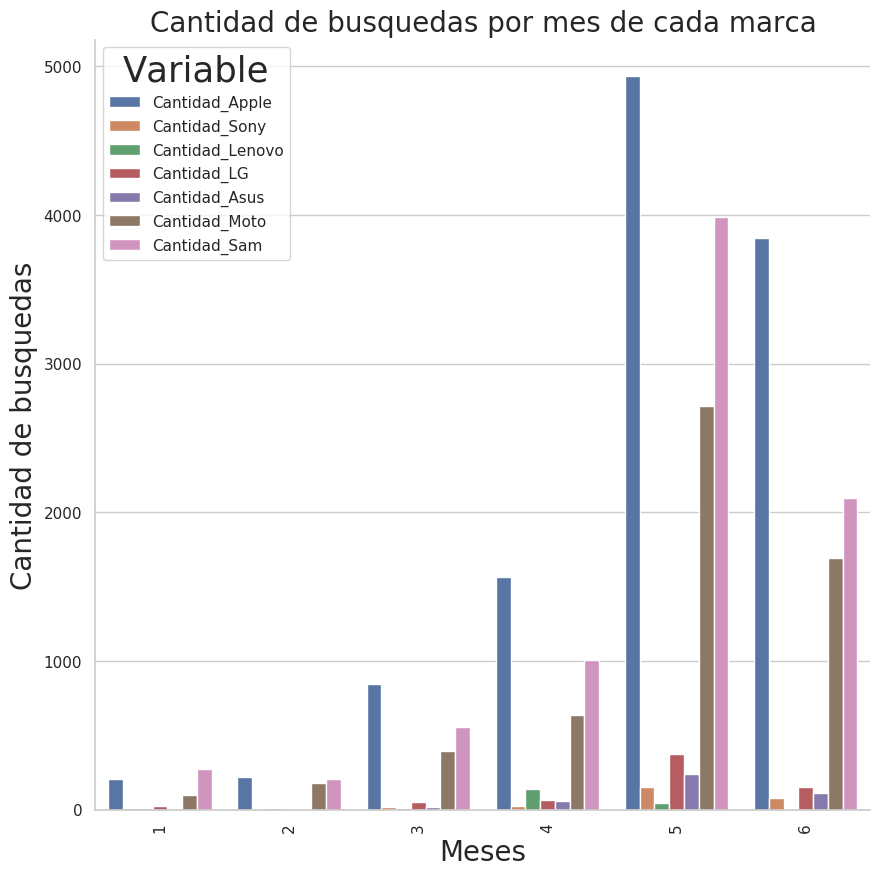

In [167]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = (
    marcas_busquedas_meses.set_index('month')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)
g = sns.barplot(x='month', y='Value', hue='Variable', data=tidy, ax=ax1, orient="v")
for item in g.get_xticklabels():
    item.set_rotation(90)

g.set_title("Cantidad de busquedas por mes de cada marca", fontsize=20)
g.set_xlabel("Meses", fontsize=20)
g.set_ylabel("Cantidad de busquedas", fontsize=20)

sns.despine(fig)